# Definição do Problema

---

O problema consiste em analisar dados das viagens do Uber para identificar padrões, tendências ou insights que possam melhorar a eficiência das viagens, compreender o comportamento dos usuários ou otimizar a operação em áreas específicas.
A análise se concentra em segmentar usuários com base em seus padrões de viagem sem rótulos predefinidos, sendo um problema não supervisionado.
Todos os dados utilizados são provenientes do consumo da própria autora do projeto que consente a liberação dessas informações, disponibilidados pela Uber.

### Premissas sobre o Problema
1.   Viagens mais longas podem ter uma correlação com um valor de tarifa mais alto;
2.   O tempo de solicitação pode influenciar a duração da viagem dependendo do tráfego na cidade naquele momento;
3. A localização inicial e final da viagem podem afetar a distância percorrida.

### Perguntas para responder
1. Como a distância percorrida influencia no valor da tarifa e na duração da viagem?
2. Qual foi o total de viagens completadas nos anos anteriores?
3. Quais foram os valores máximos, mínimos e médios da tarifa, distância percorrida e duração da viagem?
4. Qual foi o montante total das tarifas cobradas por mês e por ano?
5. Quantas viagens foram realizadas por ano, divididas pelos dias da semana?
6. Qual foi a velocidade média das viagens realizadas?

### Atributos

Atributos | Definição
--- | :---:
`Cidade` | Nome da cidade onde a viagem ocorreu.
`Tipo de Produto` | Categoria ou tipo específico de serviço oferecido pela Uber, como UberX, Uber Black, Uber Pool, etc.
`Status da Viagem ou Pedido` | Indicação do estado atual da viagem ou do pedido, como "Solicitado", "Em andamento" ou "Concluído".
`Tempo de Solicitação` | Momento em que o usuário fez a solicitação da viagem.
`Hora de Início da Viagem` | Horário em que a viagem começou.
`Início da Viagem Lat./Long.` | Coordenadas de latitude e longitude do ponto de partida da viagem.
`Endereço Inicial da Viagem` | Localização inicial (endereço) de onde a viagem foi solicitada.
`Horário de Entrega` | Horário em que a viagem foi finalizada ou entregue.
`Lat. de Desembarque` | Coordenadas de latitude e longitude do ponto de desembarque ou destino da viagem.
`Entrega de GNL` | Possível indicação se a entrega foi feita através de algum serviço específico chamado GNL.
`Endereço de Entrega` | Localização de destino da viagem (endereço).
`Distância (milhas)` | Distância percorrida durante a viagem, frequentemente medida em milhas.
`Valor da Tarifa` | Montante cobrado ao usuário pela viagem.
`Moeda Tarifária` | A moeda na qual a tarifa foi cobrada (por exemplo, dólar, euro, etc.).




# Estatísticas descritivas

In [ ]:
# Imports de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

%matplotlib inline

In [ ]:
#Importe de arquivo trips_data.csv
#Clique no botão 'Escolher arquivo' e selecione o trips_data.csv disponibilizao no github
uploaded = files.upload()

import io

uber_df = pd.read_csv(io.BytesIO(uploaded['trips_data.csv']))
uber_df.head()

# Informações sobre viagens de dataframe: tipo de índice e colunas, valores não nulos e uso de memória.
uber_df.info()

Saving trips_data.csv to trips_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  392 non-null    object 
 1   Product Type          357 non-null    object 
 2   Trip or Order Status  392 non-null    object 
 3   Request Time          392 non-null    object 
 4   Begin Trip Time       392 non-null    object 
 5   Begin Trip Lat        356 non-null    float64
 6   Begin Trip Lng        356 non-null    float64
 7   Begin Trip Address    354 non-null    object 
 8   Dropoff Time          392 non-null    object 
 9   Dropoff Lat           356 non-null    float64
 10  Dropoff Lng           356 non-null    float64
 11  Dropoff Address       356 non-null    object 
 12  Distance (miles)      385 non-null    float64
 13  Fare Amount           385 non-null    float64
 14  Fare Currency         385 non-null

In [ ]:
# Análise Exploraória do Dataset

# 1. Quantos atributos e instâncias existem?
num_atributos = len(uber_df.columns)
num_instancias = len(uber_df)
print(f"1. Quantidade de Atributos: {num_atributos}")
print(f"   Quantidade de Instâncias: {num_instancias}")

# 2. Quais são os tipos de dados dos atributos?
tipos_de_dados = uber_df.dtypes
print("\n2. Tipos de Dados dos Atributos:")
print(tipos_de_dados)

1. Quantidade de Atributos: 15
   Quantidade de Instâncias: 392

2. Tipos de Dados dos Atributos:
City                     object
Product Type             object
Trip or Order Status     object
Request Time             object
Begin Trip Time          object
Begin Trip Lat          float64
Begin Trip Lng          float64
Begin Trip Address       object
Dropoff Time             object
Dropoff Lat             float64
Dropoff Lng             float64
Dropoff Address          object
Distance (miles)        float64
Fare Amount             float64
Fare Currency            object
dtype: object


In [ ]:
# 3. Quais são  primeiras linhas do dataset?
primeiras_linhas = uber_df.head()
print("\n3. Primeiras Linhas do Dataset:")
print(primeiras_linhas)


3. Primeiras Linhas do Dataset:
             City Product Type Trip or Order Status  \
0  Rio de Janeiro          NaN            COMPLETED   
1  Rio de Janeiro          NaN            COMPLETED   
2  Rio de Janeiro          NaN            COMPLETED   
3  Rio de Janeiro          NaN            COMPLETED   
4  Rio de Janeiro          NaN            COMPLETED   

                    Request Time                Begin Trip Time  \
0  2023-10-25 15:55:58 +0000 UTC  2023-10-25 16:02:20 +0000 UTC   
1  2023-10-25 14:18:46 +0000 UTC  2023-10-25 14:20:30 +0000 UTC   
2  2023-10-24 19:42:48 +0000 UTC  2023-10-24 19:50:31 +0000 UTC   
3  2023-10-24 18:27:05 +0000 UTC  2023-10-24 18:37:56 +0000 UTC   
4  2023-10-14 22:02:14 +0000 UTC  2023-10-14 22:15:28 +0000 UTC   

   Begin Trip Lat  Begin Trip Lng  \
0      -22.972450      -43.187940   
1      -22.964680      -43.174560   
2      -22.945160      -43.182434   
3      -22.964485      -43.174065   
4      -22.936653      -43.194300   

          

In [ ]:
# 4. Há valores faltantes, discrepantes ou inconsistentes?
valores_faltantes = uber_df.isnull().sum()
valores_discrepantes = uber_df.describe().loc[['min', 'max']].T
print("\n4.Valores faltantes, discrepantes ou inconsistentes")
print("\na. Valores Faltantes:")
print(valores_faltantes)
print("\nb. Valores Discrepantes (mínimo e máximo):")
print(valores_discrepantes)


4.Valores faltantes, discrepantes ou inconsistentes

a. Valores Faltantes:
City                     0
Product Type            35
Trip or Order Status     0
Request Time             0
Begin Trip Time          0
Begin Trip Lat          36
Begin Trip Lng          36
Begin Trip Address      38
Dropoff Time             0
Dropoff Lat             36
Dropoff Lng             36
Dropoff Address         36
Distance (miles)         7
Fare Amount              7
Fare Currency            7
dtype: int64

b. Valores Discrepantes (mínimo e máximo):
                        min        max
Begin Trip Lat   -23.624666  -5.054721
Begin Trip Lng   -46.680264 -42.746918
Dropoff Lat      -23.648092  -5.054733
Dropoff Lng      -46.685783 -42.761898
Distance (miles)   0.000000  10.220000
Fare Amount        0.000000  74.900000


In [ ]:
# 5. Resumo estatístico dos atributos com valor numérico
resumo_estatistico = uber_df.describe(include='number')
print("\n5. Resumo Estatístico dos Atributos Numéricos:")
print(resumo_estatistico)


5. Resumo Estatístico dos Atributos Numéricos:
       Begin Trip Lat  Begin Trip Lng  Dropoff Lat  Dropoff Lng  \
count      356.000000      356.000000   356.000000   356.000000   
mean       -20.022878      -43.263565   -20.024190   -43.264945   
std          6.657385        0.724574     6.654174     0.723975   
min        -23.624666      -46.680264   -23.648092   -46.685783   
25%        -22.964752      -43.182801   -22.964613   -43.182488   
50%        -22.961202      -43.176322   -22.955193   -43.176320   
75%        -22.942418      -43.174087   -22.944306   -43.173890   
max         -5.054721      -42.746918    -5.054733   -42.761898   

       Distance (miles)  Fare Amount  
count        385.000000   385.000000  
mean           2.322104    12.901455  
std            2.030021     9.435535  
min            0.000000     0.000000  
25%            1.000000     8.950000  
50%            1.960000    11.920000  
75%            3.290000    16.990000  
max           10.220000    74.900000

# Tratamento dos Dados

In [ ]:
# Renomeando Colunas
uber_df.rename(columns={'City': 'city', 'Product Type': 'product_type', 'Trip or Order Status': 'status',
                      'Request Time': 'request_time', 'Begin Trip Time': 'begin_time', 'Begin Trip Lat': 'begin_lat',
                     'Begin Trip Lng': 'begin_long', 'Dropoff Time': 'dropoff_time', 'Dropoff Lat': 'dropoff_lat',
                      'Dropoff Lng': 'dropoff_long', 'Distance (miles)': 'distance_km','Fare Amount':'fare_amount'}, inplace=True)

In [ ]:
#Removendo linhas de um DataFrame do pandas em que o valor na coluna 'product_type' seja nulo ou NaN (valores ausentes)
uber_df.dropna(subset = ['product_type'], inplace=True)
uber_df[uber_df.begin_lat.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency
28,Rio de Janeiro,Moto,CANCELED,2023-08-24 21:01:37 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
29,Rio de Janeiro,Moto,CANCELED,2023-08-24 20:59:17 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
105,Rio de Janeiro,UberX,CANCELED,2023-04-13 11:42:40 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
154,Rio de Janeiro,UberX,CANCELED,2023-03-04 21:10:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
249,Sao Paulo,Comfort Planet,CANCELED,2022-10-06 09:48:19 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
261,Rio de Janeiro,UberX,CANCELED,2022-09-21 11:49:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
272,Rio de Janeiro,UberX,CANCELED,2022-08-24 13:43:30 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
286,Teresina,UberX,CANCELED,2022-08-05 20:22:59 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
312,Rio de Janeiro,UberX,CANCELED,2022-04-02 04:50:20 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL
319,Teresina,UberX,CANCELED,2022-03-10 10:47:18 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.0,0.0,BRL


In [ ]:
# Realização da conversão de milas para kilometros
uber_df['distance_km'] = uber_df['distance_km']*1.60934
uber_df.distance_km

7       0.000000
8       1.705900
9       1.738087
10      4.409592
11      3.926790
         ...    
387     6.968442
388     7.370777
389     7.274217
390     5.101608
391    12.440198
Name: distance_km, Length: 357, dtype: float64

In [ ]:
# Obtendo o ano, mês e dia da semana da data da solicitação
def date_convertion(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
        df[col] = pd.to_datetime(df[col])
    return df

uber_df = date_convertion(uber_df, ['request_time', 'begin_time', 'dropoff_time'])

uber_df['year'] = uber_df.request_time.map(lambda x: datetime.strftime(x,"%Y"))
uber_df['month'] = uber_df.request_time.map(lambda x: datetime.strftime(x,"%b"))
uber_df['weekday'] = uber_df.request_time.map(lambda x: datetime.strftime(x,"%a"))

In [ ]:
# Filtrando linhas em que a data na coluna 'begin_time' é diferente da data na coluna 'dropoff_time'.
uber_df.loc[uber_df['begin_time'].dt.date != uber_df['dropoff_time'].dt.date]

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency,year,month,weekday
210,Rio de Janeiro,UberX,COMPLETED,2022-12-11 23:32:04,2022-12-11 23:42:30,-22.986515,-43.207096,Av. Vieira Souto - Ipanema - Rio de Janeiro - ...,2022-12-12 00:04:38,-22.964396,-43.173880,"Avenida Princesa Isabel, 7, B - Rio de Janeiro...",5.359102,14.93,BRL,2022,Dec,Sun
255,Rio de Janeiro,UberX,COMPLETED,2022-10-04 23:54:06,2022-10-04 23:56:34,-22.964450,-43.173990,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",2022-10-05 00:14:37,-22.899038,-43.209656,"Av. Francisco Bicalho, 1 - Santo Cristo, Rio d...",10.830858,26.91,BRL,2022,Oct,Tue
391,Teresina,UberX,COMPLETED,2020-03-02 23:43:53,2020-03-02 23:47:45,-5.072298,-42.751578,"R. Farmacêutico João Carvalho, 5517 - Santa Is...",2020-03-03 00:11:45,-5.136999,-42.807558,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",12.440198,19.51,BRL,2020,Mar,Mon


In [ ]:
# Obtendo a duração da viagem (minutos)
uber_df['trip_duration'] = (uber_df['dropoff_time'] - uber_df['begin_time']).dt.total_seconds()/60
uber_df

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency,year,month,weekday,trip_duration
7,Rio de Janeiro,UberX,CANCELED,2023-10-06 22:42:17,1970-01-01 00:00:00,-22.961071,-43.202470,"R. Fonte Da Saudade, 39 - Lagoa - Rio de Janei...",1970-01-01 00:00:00,-22.961071,-43.202470,"R. Fonte Da Saudade, 39 - Lagoa - Rio de Janei...",0.000000,0.00,BRL,2023,Oct,Fri,0.000000
8,Rio de Janeiro,UberX,COMPLETED,2023-10-05 21:53:24,2023-10-05 21:55:25,-22.972550,-43.187940,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,2023-10-05 22:13:06,-22.964590,-43.174640,"Avenida Prado Júnior, 48 - Copacabana - Rio de...",1.705900,9.92,BRL,2023,Oct,Thu,17.683333
9,Rio de Janeiro,UberX,COMPLETED,2023-10-05 21:05:05,2023-10-05 21:16:36,-22.964490,-43.179670,"Rua Barata Ribeiro, 194 - Copacabana - Rio de ...",2023-10-05 21:29:54,-22.973690,-43.188700,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,1.738087,12.29,BRL,2023,Oct,Thu,13.300000
10,Rio de Janeiro,UberX,COMPLETED,2023-10-05 01:17:18,2023-10-05 01:24:17,-22.947813,-43.183422,R. Prof. Alfredo Gomes - Botafogo - Rio de Jan...,2023-10-05 01:39:14,-22.963785,-43.172140,"Rua Gustavo Sampaio, 732 - Leme - Rio de Janei...",4.409592,16.92,BRL,2023,Oct,Thu,14.950000
11,Rio de Janeiro,UberX,COMPLETED,2023-10-04 20:52:06,2023-10-04 20:56:57,-22.964565,-43.174004,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",2023-10-04 21:12:05,-22.947659,-43.182537,"Praia de Botafogo, 400 - Botafogo - Rio de Jan...",3.926790,13.93,BRL,2023,Oct,Wed,15.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Teresina,UberX,COMPLETED,2020-03-13 23:14:06,2020-03-13 23:17:39,-5.136976,-42.807575,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",2020-03-13 23:36:42,-5.100644,-42.789122,"Av. Abdias Neves, 1649 - Cristo Rei, Teresina ...",6.968442,21.19,BRL,2020,Mar,Fri,19.050000
388,Teresina,UberX,COMPLETED,2020-03-10 10:40:38,2020-03-10 10:48:15,-5.137026,-42.807562,"R. Seis, 356 - Saci, Teresina - PI, 64020-460,...",2020-03-10 11:04:40,-5.105740,-42.764202,"Conj. Dirceu Arcoverde II Qu 159, 9 - Parque I...",7.370777,15.49,BRL,2020,Mar,Tue,16.416667
389,Teresina,UberX,COMPLETED,2020-03-07 11:39:23,2020-03-07 11:45:36,-5.137006,-42.807589,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",2020-03-07 12:01:28,-5.105634,-42.763874,"Conj. Dirceu Arcoverde I Qu 9, 13 - Parque Ide...",7.274217,13.54,BRL,2020,Mar,Sat,15.866667
390,Teresina,UberX,COMPLETED,2020-03-05 11:14:40,2020-03-05 11:21:08,-5.122359,-42.801298,"Av. Barão de Gurguéia, 3119 - Tabuleta, Teresi...",2020-03-05 11:31:11,-5.105513,-42.764078,"Conj. Dirceu Arcoverde I Qu 9, 13 - Parque Ide...",5.101608,10.66,BRL,2020,Mar,Thu,10.050000


# Análise de dados & Visualizações

Nesta sessão serão respondidas as peguntas apresentadas na problemática

In [ ]:
#Série contendo contagens de valores únicos das cidades que ocorreram corridas
print('\nContagens de valores únicos das cidades que ocorreram corridas:')
contagem_cidades = uber_df.city.value_counts()
print(contagem_cidades)

# Série contendo contagens de valores exclusivos de tipos de produtos.
print('\nContagens de valores exclusivos de tipos de produtos:')
contagem_produtos = uber_df.product_type.value_counts()
print(contagem_produtos)

# Frequência do status das viagens.
print('\nFrequência do status das viagens:')
contagem_viagens = uber_df.status.value_counts()
print(contagem_viagens)


Contagens de valores únicos das cidades que ocorreram corridas:
Rio de Janeiro    279
Teresina           61
Sao Paulo          16
Petropolis          1
Name: city, dtype: int64

Contagens de valores exclusivos de tipos de produtos:
UberX             348
Black               3
Moto                2
Comfort             2
VIP                 1
Comfort Planet      1
Name: product_type, dtype: int64

Frequência do status das viagens:
COMPLETED          318
CANCELED            37
DRIVER_CANCELED      2
Name: status, dtype: int64


**1. Como a distância percorrida influencia no valor da tarifa?**

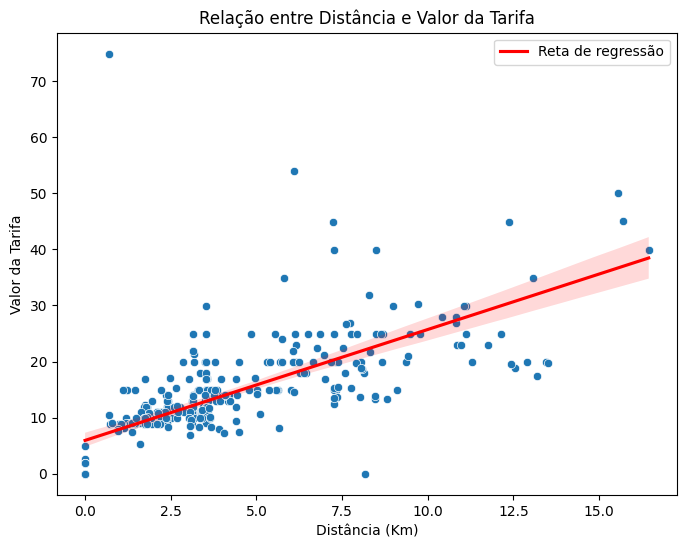

In [ ]:
#Relação entre a distância percorrida e o valor da tarifa

# Gráfico de dispersão para visualizar a relação entre distância e valor da tarifa
plt.figure(figsize=(8, 6))
sns.scatterplot(data=uber_df, x='distance_km', y='fare_amount')

# Adicionando a reta de regressão linear
sns.regplot(data=uber_df, x='distance_km', y='fare_amount', scatter=False, color='red', label='Reta de regressão')

plt.title('Relação entre Distância e Valor da Tarifa')
plt.xlabel('Distância (Km)')
plt.ylabel('Valor da Tarifa')
plt.legend()
plt.show()



Com base no gráfico acima, pode-se perceber que, quanto maior a distância percorrida, maior será o custo da viagem. Além disso, os valores mais distantes da reta de regressão podem ser justificados pelo tipo específico de serviço, como UberX, Uber Black, Uber Comfort, etc.

**2.  Total de viagens completadas nos anos anteriores?**

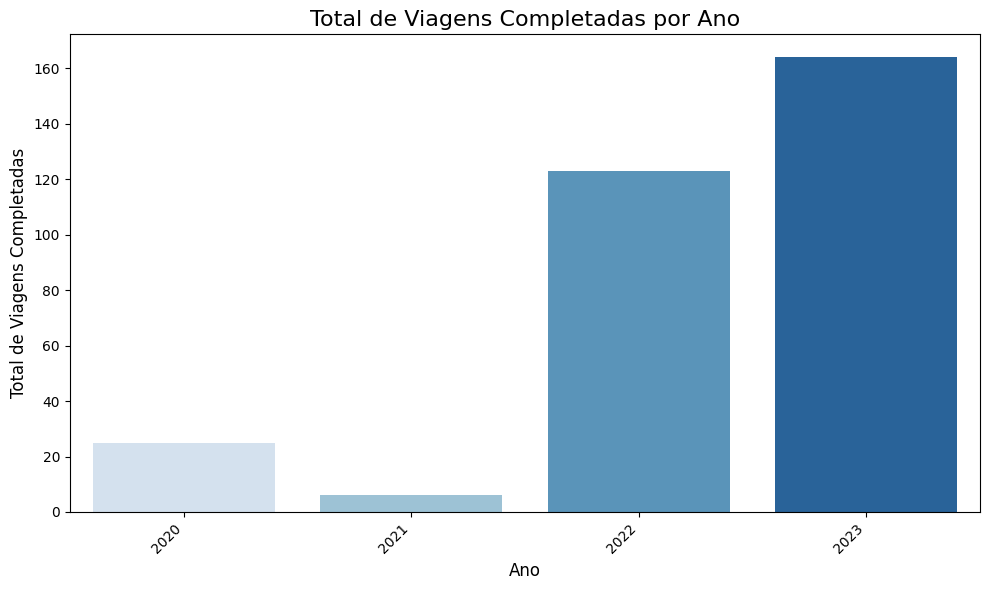

In [ ]:
# Contagem de viagens durante dos anos

# Filtrando viagens completadas ('status' é 'completed')
completed_trips = uber_df[uber_df['status'] == 'COMPLETED']

# Contando o número de viagens completadas por ano
completed_trips_by_year = completed_trips['year'].value_counts().sort_index()

# Criando o gráfico de barras
import seaborn as sns

# Definindo uma paleta de cores azuis
palette = sns.color_palette("Blues", len(completed_trips_by_year))

# Criando o gráfico de barras com o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=completed_trips_by_year.index, y=completed_trips_by_year, palette=palette)
plt.title('Total de Viagens Completadas por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Viagens Completadas', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Ajusta a rotação dos rótulos do eixo x
plt.yticks(fontsize=10)  # Tamanho da fonte no eixo y
plt.tight_layout()
plt.show()


De acordo com o gráfico, observa-se um baixo uso do aplicativo nos anos de 2020 e 2021, o que se justifica pelo período de lockdown causado pela Covid-19. O número de viagens cresce nos anos seguintes, chegando a mais de 150 viagens em 2023.

**3. Quais foram os valores máximos, mínimos e médios da tarifa, distância percorrida e duração da viagem?**

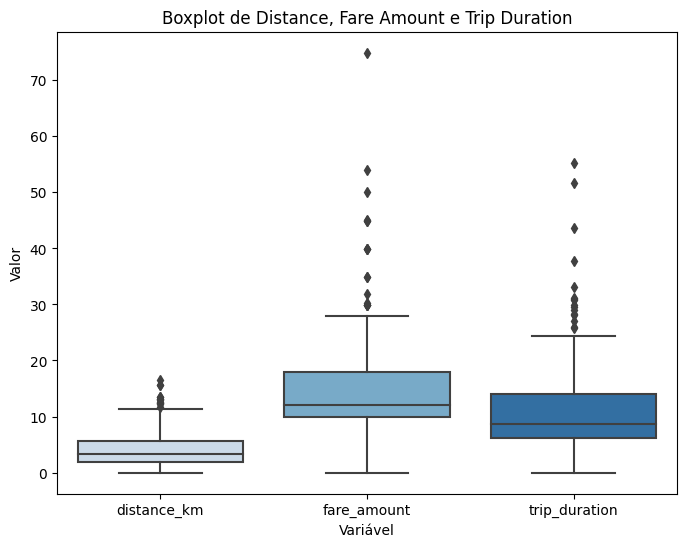

In [ ]:
# Obervação das distribuição de valores

# Gráfico de boxplot para as colunas de interesse
plt.figure(figsize=(8, 6))
sns.boxplot(data=uber_df[['distance_km', 'fare_amount', 'trip_duration']], palette='Blues')
plt.title('Boxplot de Distance, Fare Amount e Trip Duration')
plt.ylabel('Valor')
plt.xlabel('Variável')
plt.show()

**4. Qual foi o montante total das tarifas cobradas por mês e por ano?**

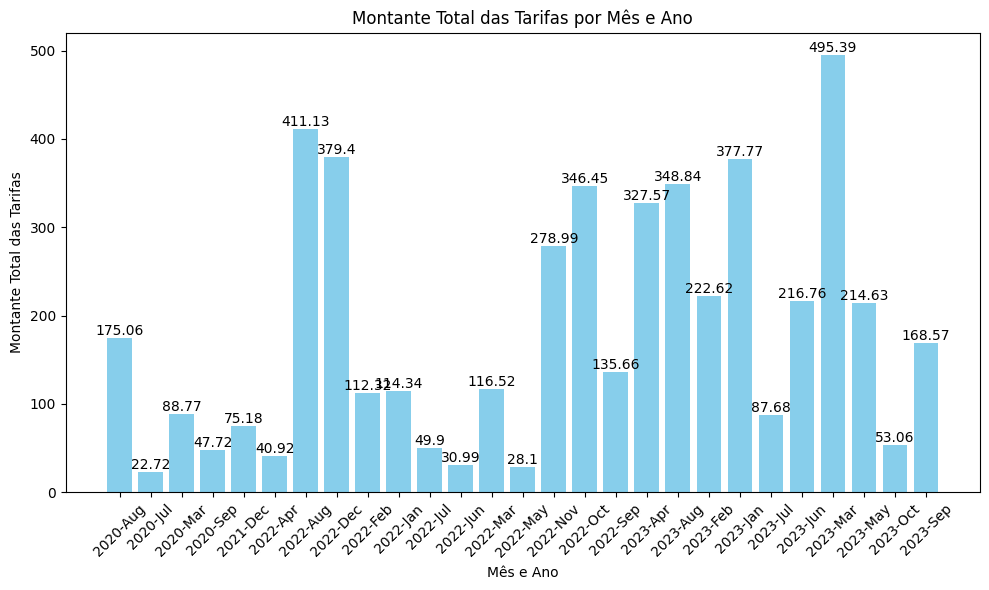

In [ ]:
# Calculando o montante total das tarifas por mês e ano

total_tarifas_por_mes_ano = uber_df.groupby(['year', 'month'])['fare_amount'].sum().reset_index()

# Criando o gráfico de barras para o montante total das tarifas por mês e ano
plt.figure(figsize=(10, 6))
bars = plt.bar(total_tarifas_por_mes_ano.index, total_tarifas_por_mes_ano['fare_amount'], color='skyblue')
plt.title('Montante Total das Tarifas por Mês e Ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Montante Total das Tarifas')
plt.xticks(total_tarifas_por_mes_ano.index, total_tarifas_por_mes_ano['year'].astype(str) + '-' + total_tarifas_por_mes_ano['month'].astype(str), rotation=45)
plt.tight_layout()

# Adicionando labels aos retângulos do gráfico
for bar, label in zip(bars, total_tarifas_por_mes_ano['fare_amount']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(label, 2), ha='center', va='bottom')

plt.show()

Com base no montante ao longo dos meses, observa-se um maior gasto em junho de 2023, com quase 500 reais gastos em corridas.

**5. Quantas viagens foram realizadas por ano, divididas pelos dias da semana?**

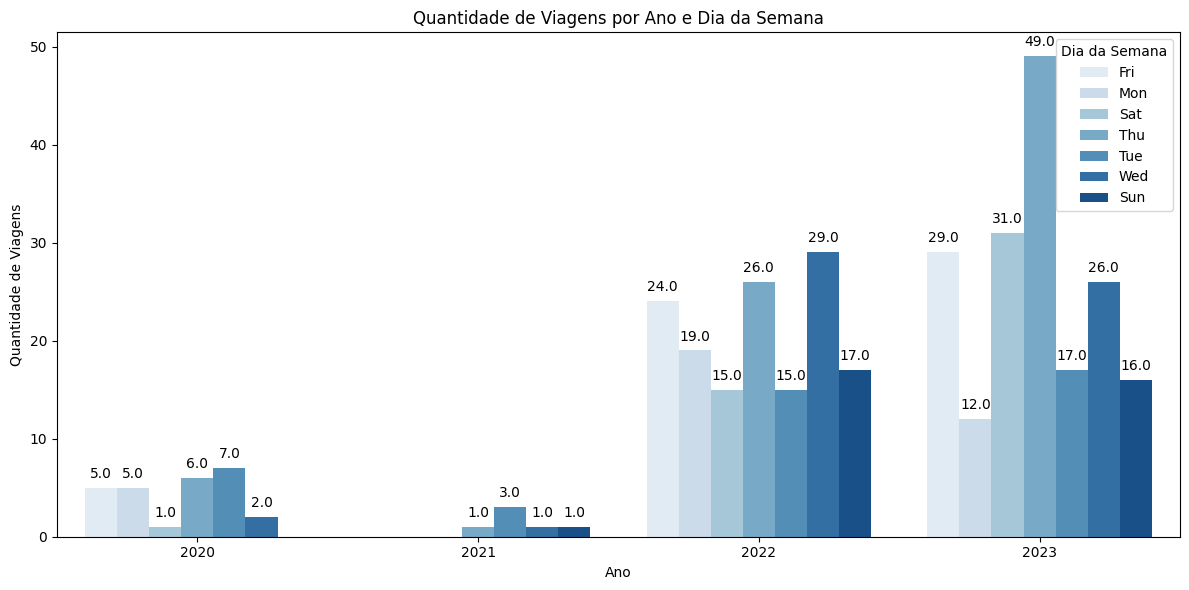

In [ ]:
# Observação das viagens por dia da semana

viagens_por_ano_dia_semana = uber_df.groupby(['year', 'weekday']).size().reset_index(name='count')

# Criando o gráfico de barras para as viagens por ano e dia da semana
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=viagens_por_ano_dia_semana, x='year', y='count', hue='weekday', palette='Blues')
plt.title('Quantidade de Viagens por Ano e Dia da Semana')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Viagens')
plt.legend(title='Dia da Semana', loc='upper right')

# Adicionando rótulos nos retângulos do gráfico
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

A partir do gráfico acima, observa-se uma variação anual em relação aos dias da semana com maior uso do aplicativo. Para o ano de 2023, nota-se o maior número de viagens ocorridas na quinta-feira (Thursday).

**6. Qual foi a velocidade média das viagens realizadas?**

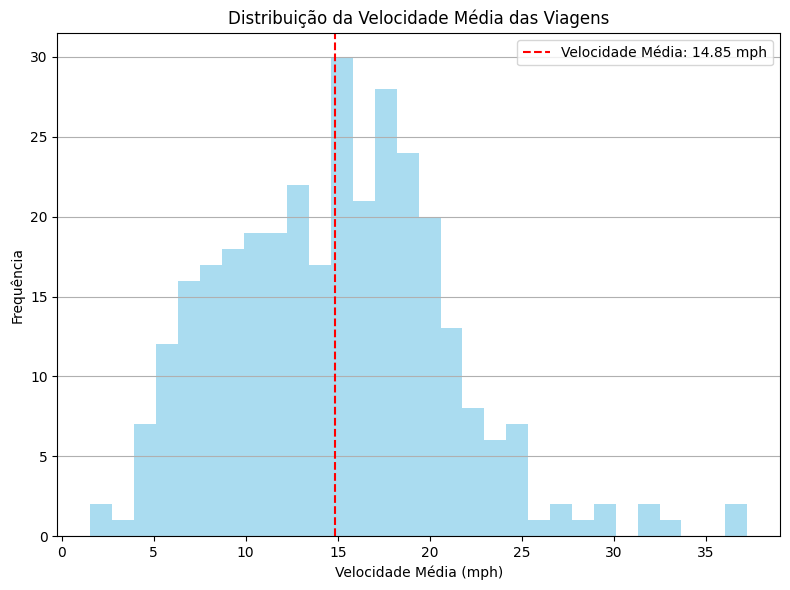

In [ ]:
# Obtendo a velocidade média das viagens

# Calculando a velocidade média das viagens (supondo que a distância esteja em km e a duração da viagem em horas)
uber_df['speed_kmph'] = uber_df['distance_km'] / (uber_df['trip_duration'] / 60)  # Convertendo a duração da viagem para minutos

# Calculando a velocidade média em mph (milhas por hora)
uber_df['speed_mph'] = uber_df['speed_kmph'] * 0.621371  # Convertendo km/h para mph

# Calculando a velocidade média total de todas as viagens
velocidade_media_total = uber_df['speed_mph'].mean()

# Criando o gráfico para a velocidade média das viagens
plt.figure(figsize=(8, 6))
plt.hist(uber_df['speed_mph'], bins=30, color='skyblue', alpha=0.7)
plt.axvline(velocidade_media_total, color='red', linestyle='dashed', linewidth=1.5, label=f'Velocidade Média: {velocidade_media_total:.2f} mph')
plt.title('Distribuição da Velocidade Média das Viagens')
plt.xlabel('Velocidade Média (mph)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Clusterização

In [ ]:
# Selecionando colunas específicas para criar um novo DataFrame
uber_df
col = ['city', 'product_type', 'distance_km', 'fare_amount', 'trip_duration']
uber_ml = uber_df[col]
uber_ml

,city,product_type,distance_km,fare_amount,trip_duration
7,Rio de Janeiro,UberX,0.000000,0.00,0.000000
8,Rio de Janeiro,UberX,1.705900,9.92,17.683333
9,Rio de Janeiro,UberX,1.738087,12.29,13.300000
10,Rio de Janeiro,UberX,4.409592,16.92,14.950000
11,Rio de Janeiro,UberX,3.926790,13.93,15.133333
...,...,...,...,...,...
387,Teresina,UberX,6.968442,21.19,19.050000
388,Teresina,UberX,7.370777,15.49,16.416667
389,Teresina,UberX,7.274217,13.54,15.866667
390,Teresina,UberX,5.101608,10.66,10.050000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criando uma cópia do DataFrame para evitar alterações indesejadas no original
uber_ml_copy = uber_ml.copy()

# Inicializando o LabelEncoder
encoder = LabelEncoder()

# Aplicando o LabelEncoder usando .loc[]
uber_ml_copy.loc[:, ['city', 'product_type']] = uber_ml_copy.loc[:, ['city', 'product_type']].apply(encoder.fit_transform)

uber_ml


,city,product_type,distance_km,fare_amount,trip_duration
7,1,4,0.000000,0.00,0.000000
8,1,4,1.705900,9.92,17.683333
9,1,4,1.738087,12.29,13.300000
10,1,4,4.409592,16.92,14.950000
11,1,4,3.926790,13.93,15.133333
...,...,...,...,...,...
387,3,4,6.968442,21.19,19.050000
388,3,4,7.370777,15.49,16.416667
389,3,4,7.274217,13.54,15.866667
390,3,4,5.101608,10.66,10.050000


In [ ]:
#Redução de dimensionalidade StandardScaler

from sklearn.preprocessing import StandardScaler


X = uber_ml.iloc[:,0:6].values
scaler=StandardScaler()
X= scaler.fit_transform(X)


In [ ]:
# Calculando a matriz de correlação
correlation_matrix = X.corr()

# Criando o mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Dados Uber')
plt.show()

Número de clusters: 1, Inertia: 1784.9999999999998
Número de clusters: 2, Inertia: 1187.7782031837664
Número de clusters: 3, Inertia: 888.8196846155465
Número de clusters: 4, Inertia: 671.1483346114898
Número de clusters: 5, Inertia: 549.6722252717551
Número de clusters: 6, Inertia: 458.97900192757373
Número de clusters: 7, Inertia: 372.001381425399
Número de clusters: 8, Inertia: 319.1896941642668
Número de clusters: 9, Inertia: 285.8234723784732
Número de clusters: 10, Inertia: 259.84539715027535


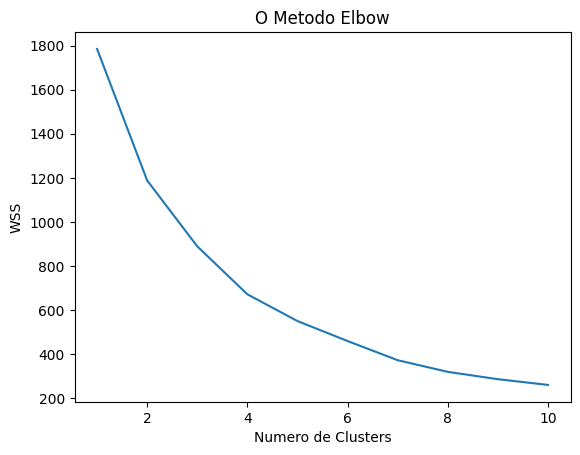

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=(0), n_init=10)
    kmeans.fit(X)
    print(f"Número de clusters: {i}, Inertia: {kmeans.inertia_}")
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [ ]:
#K-Means, K = 3

kmeans = KMeans(n_clusters=3, random_state = 0, n_init=10)
previsoes = kmeans.fit_predict(X)

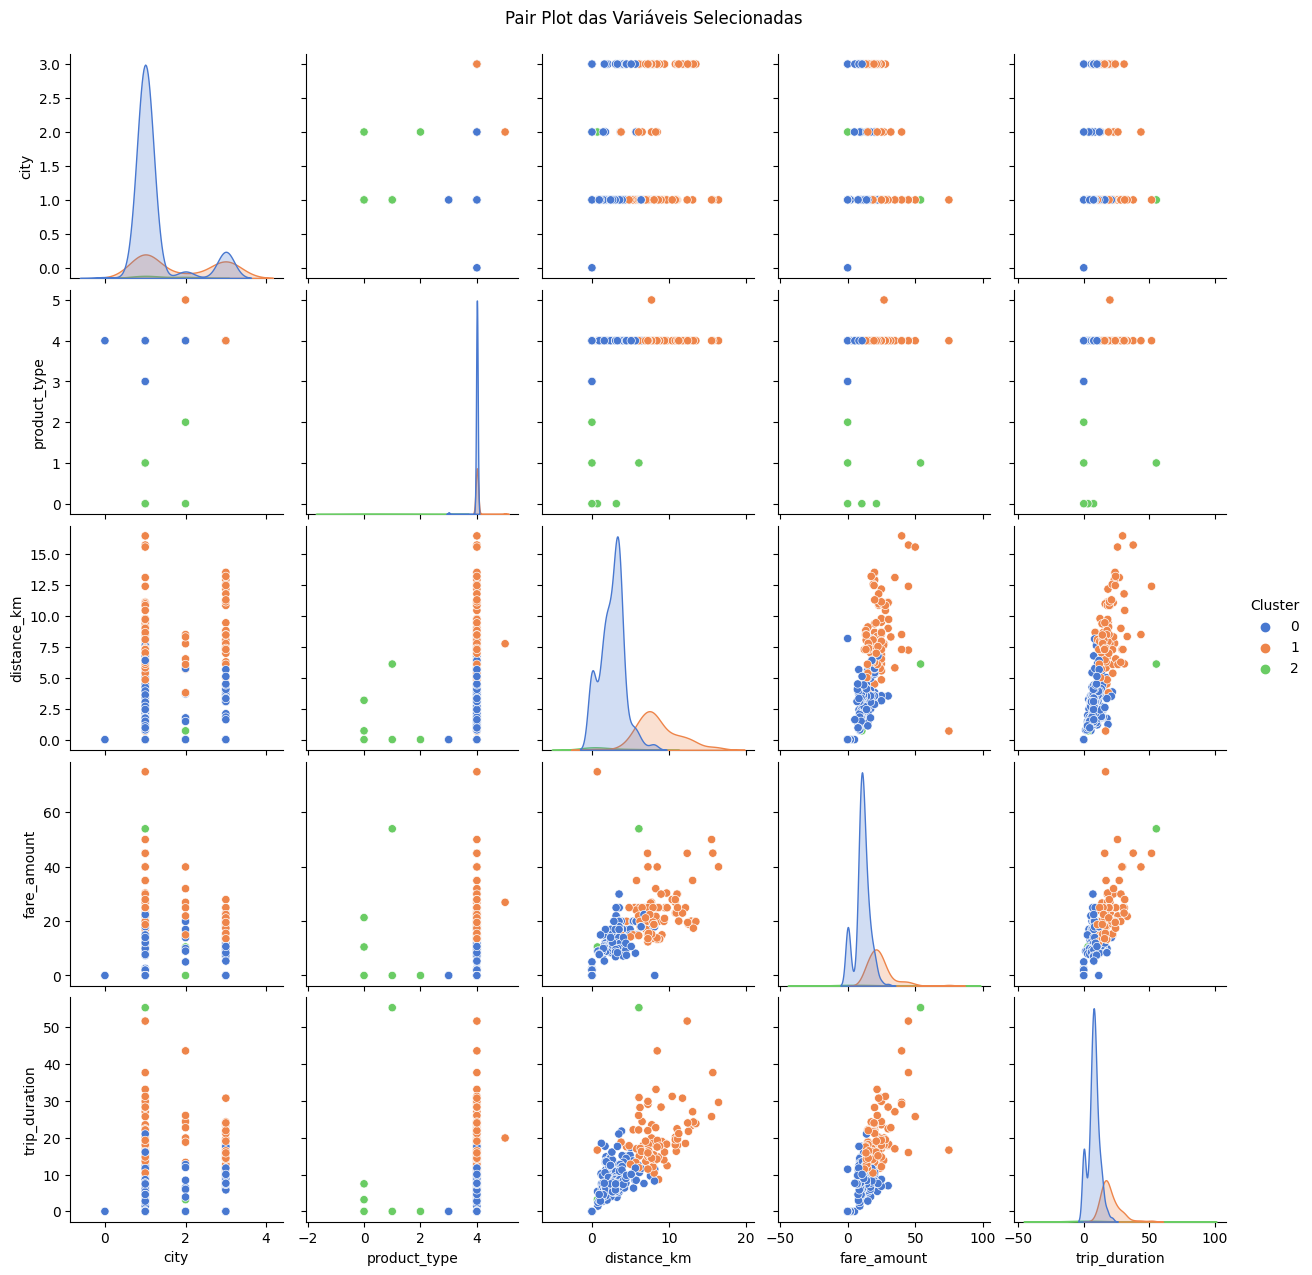

In [ ]:
#Grid de gráficos de dispersão para visualizar a relação entre pares de variáveis numéricas

sns.pairplot(uber_ml, hue='Cluster', palette='muted')
plt.suptitle('Pair Plot das Variáveis Selecionadas', y=1.02)
plt.show()